In [69]:
#importing dependencies

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
import pandas as pd
import librosa  
import librosa.display as ld
from scipy.io import wavfile as wav
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from datetime import datetime
import numpy as np

In [70]:
#analysing audio file

In [4]:
filename =  'UrbanSound8K/audio1.wav'

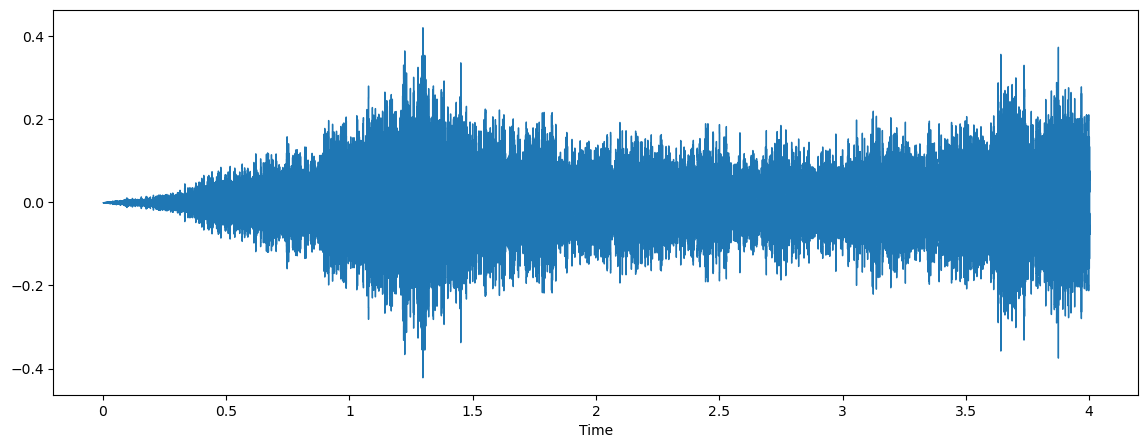

In [5]:
plt.figure(figsize=(14,5))
librosa_data, librosa_sample_rate=librosa.load(filename)
ld.waveshow(librosa_data, sr=librosa_sample_rate)
ipd.Audio(filename)

In [6]:
librosa_data

array([-3.2382101e-07,  3.1202234e-07, -2.6679845e-07, ...,
       -1.0617730e-03,  1.9647056e-02,  9.3931932e-04], dtype=float32)

In [7]:
librosa_sample_rate

22050

In [8]:
wav_sample_rate, wave_audio = wav.read(filename)

In [9]:
wave_audio

array([[   0,    0],
       [   0,    0],
       [   0,    0],
       ...,
       [ 479,  479],
       [ 125,  125],
       [-439, -439]], dtype=int16)

In [10]:
wav_sample_rate

44100

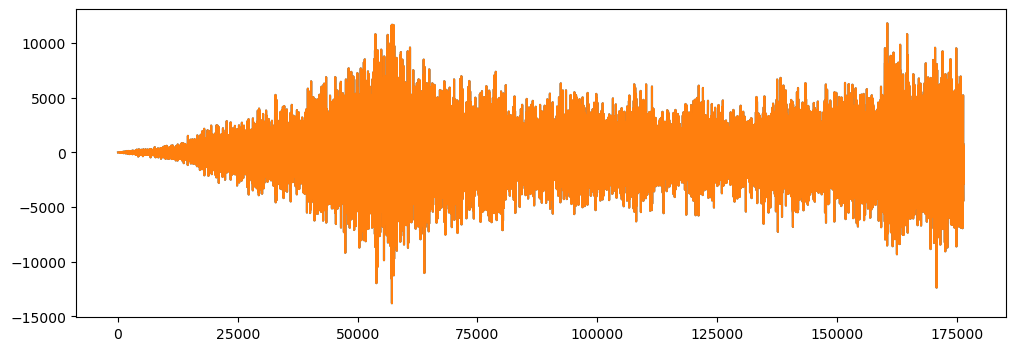

In [11]:
plt.figure(figsize=(12,4))
plt.plot(wave_audio)

In [71]:
#data analysis

In [12]:
metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [13]:
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [72]:
#mel frequency cepstral coefficients

In [15]:
mfcc = librosa.feature.mfcc(y=librosa_data,sr=librosa_sample_rate, n_mfcc=40)
print(mfcc.shape)

(40, 173)


In [16]:
mfcc

array([[-5.87517151e+02, -5.13106873e+02, -4.71362610e+02, ...,
        -1.27218536e+02, -1.26724243e+02, -1.47182938e+02],
       [ 5.30002327e+01,  8.85354309e+01,  1.00171036e+02, ...,
         1.27934807e+02,  1.27637299e+02,  1.28114548e+02],
       [ 8.85834599e+00, -1.29099674e+01, -2.18804970e+01, ...,
        -7.74523087e+01, -7.46818848e+01, -6.70821457e+01],
       ...,
       [-2.06355810e+00, -1.76589638e-01, -2.79653996e-01, ...,
        -2.99550509e+00,  6.31092691e+00,  1.16738262e+01],
       [-2.68619967e+00,  7.16069520e-01,  4.23016167e+00, ...,
        -1.61510391e+01, -1.18981304e+01, -8.92341042e+00],
       [ 1.80334735e+00, -1.09526247e-01,  1.56121051e+00, ...,
        -7.84424114e+00, -4.11752415e+00, -3.28549075e+00]], dtype=float32)

In [73]:
#for entire audio file

In [18]:
dataset_path = 'UrbanSound8K/audio/'


In [19]:
def features_extractor(file):
    audio,sample_rate= librosa.load(file_name,res_type='kaiser_fast')
    mfcc_feature= librosa.feature.mfcc(y=audio,sr=sample_rate, n_mfcc=40)
    mfcc_scaled= np.mean(mfcc_feature.T,axis=0)
    
    return mfcc_scaled

In [20]:
from tqdm import tqdm

extracted_feature=[]
for index_num, row in tqdm(metadata.iterrows()):
    file_name=os.path.join(os.path.abspath(dataset_path),'fold'+str(row['fold'])+'/',str(row['slice_file_name']))
    class_labels=row['class']
    data=features_extractor(file_name)
    extracted_feature.append([data, class_labels])
    
                        

3555it [06:59,  7.09it/s]/home/dhanush/anaconda3/envs/opencv_pro/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8325it [15:56, 15.51it/s]/home/dhanush/anaconda3/envs/opencv_pro/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
/home/dhanush/anaconda3/envs/opencv_pro/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [16:38,  8.74it/s]


In [21]:
extra_feature_df = pd.DataFrame(extracted_feature,columns=['feature','class'])
extra_feature_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402214, 60.302044,...",children_playing


In [22]:
X = np.array(extra_feature_df['feature'].tolist())
Y = np.array(extra_feature_df['class'].tolist())

In [23]:
print(X.shape)


(8732, 40)


In [24]:
labelencoder = LabelEncoder()
Y=to_categorical(labelencoder.fit_transform(Y))
print(Y.shape)

(8732, 10)


In [25]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=.20, random_state=0)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6985, 40)
(1747, 40)
(6985, 10)
(1747, 10)


In [27]:
num_labels=Y.shape[1]

In [74]:
#model

In [28]:
model = Sequential()
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))


2023-01-28 19:52:40.179394: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/dhanush/catkin_ws3/devel/lib:/home/dhanush/catkin_ws1/devel/lib:/home/dhanush/catkin_ws/devel/lib:/opt/ros/noetic/lib
2023-01-28 19:52:40.180998: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-28 19:52:40.182419: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dhanush-HP-Laptop-14-ck2xxx): /proc/driver/nvidia/version does not exist
2023-01-28 19:52:40.187517: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To ena

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [81]:
#Model training

In [30]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [31]:

checkpointer=ModelCheckpoint(filepath='saved_model.hdf5',
                             verbose=1, save_best_only=True)

start=datetime.now()

model.fit(X_train, Y_train, batch_size=32, epochs = 200, validation_data = (X_test, Y_test),callbacks = [checkpointer], verbose=1) 
               
duration = datetime.now() -start
print('Training  time: ', duration)

Epoch 1/200
186/219 [========================>.....] - ETA: 0s - loss: 14.9399 - accuracy: 0.1077
Epoch 1: val_loss improved from inf to 2.29298, saving model to saved_model.hdf5
219/219 [==============================] - 1s 2ms/step - loss: 13.1953 - accuracy: 0.1107 - val_loss: 2.2930 - val_accuracy: 0.1156
Epoch 2/200
188/219 [========================>.....] - ETA: 0s - loss: 2.6597 - accuracy: 0.1127
Epoch 2: val_loss improved from 2.29298 to 2.28148, saving model to saved_model.hdf5
219/219 [==============================] - 0s 2ms/step - loss: 2.6291 - accuracy: 0.1118 - val_loss: 2.2815 - val_accuracy: 0.1082
Epoch 3/200
207/219 [===========================>..] - ETA: 0s - loss: 2.3643 - accuracy: 0.1129
Epoch 3: val_loss improved from 2.28148 to 2.27492, saving model to saved_model.hdf5
219/219 [==============================] - 0s 2ms/step - loss: 2.3595 - accuracy: 0.1131 - val_loss: 2.2749 - val_accuracy: 0.1070
Epoch 4/200
184/219 [========================>.....] - ETA: 0s 

In [76]:
test_accuracy = model.evaluate(X_test, Y_test, verbose=1)
print('Accuracy of the model on test dataset:', test_accuracy[1]*100, '%')


55/55 [==============================] - 0s 1ms/step - loss: 0.7001 - accuracy: 0.7911
Accuracy of the model on test dataset: 79.10704016685486 %


In [77]:
#Testing the model

In [33]:
file = 'UrbanSound8K/audio1.wav'

test_audio, test_sample_rate = librosa.load(file, res_type='kaiser_fast')
mfcc_feat = librosa.feature.mfcc(y=test_audio, sr= test_sample_rate, n_mfcc=40)
mfcc_scale_feat = np.mean(mfcc_feat.T,axis=0)

mfcc_scale_feat = mfcc_scale_feat.reshape(1,-1)

pred_value = model.predict(mfcc_scale_feat)
pred_value

1/1 [==============================] - 0s 111ms/step


array([[0.06092692, 0.01119556, 0.3219505 , 0.10376689, 0.03799751,
        0.02353819, 0.02454473, 0.0030346 , 0.01819351, 0.39485168]],
      dtype=float32)

In [66]:
list1 = tf.Variable(pred_value).numpy().tolist()

In [67]:
max_position = max(max(list1))
pred_index = list1[0].index(max_position)
pred_index

9

In [68]:
pred_class = labelencoder.inverse_transform([pred_index])
pred_class


array(['street_music'], dtype='<U16')

In [80]:
print('The predicted class is:', pred_class[0])

The predicted class is: street_music
